# Importing necessary libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from keras.layers import Dense,Flatten
from keras.models import Sequential
from keras.optimizers import Adam
import cv2
import os
import random

In [3]:
# DIRECTORY PATH TO THE DATASET
data_dir = "C:/Users/navin/Downloads/archive (1)/dataset/"

In [ ]:
#setting height and width values for all images
img_height,img_width=180,180

### splitting the data for training

In [4]:
batch_size=32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3305 files belonging to 6 classes.
Using 2644 files for training.


### splitting the data for validation

In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3305 files belonging to 6 classes.
Using 661 files for validation.


In [6]:
classes=train_ds.class_names

In [7]:
#displaying the class labels
classes

['dew', 'fogsmog', 'lightning', 'rain', 'rainbow', 'snow']

In [8]:
# shows total num of labels which will be used in deciding the num of neurons in output layer
num_of_classes=len(classes)

In [9]:
print(num_of_classes)

6


### plotting some images in each class labels in training set

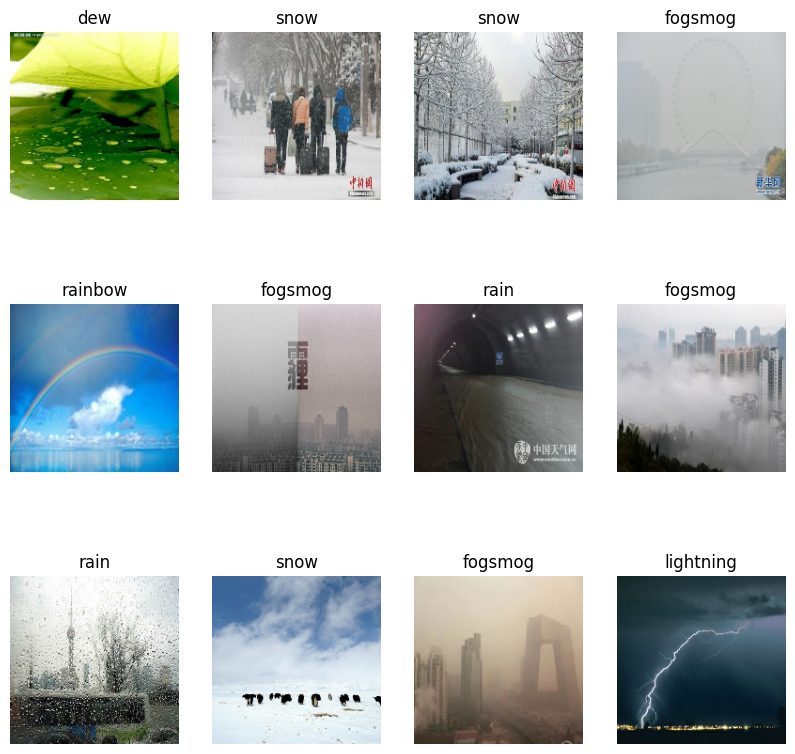

In [14]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(classes[labels[i]])
    plt.axis("off")

In [15]:
dir_path="D:/project/weather_test/"

# 2. Model Building

### Using resnet50 architecture a pretrained transfer learning model to enhance our hybrid model

In [16]:
model=tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    pooling="max",
    classes=num_of_classes

)

In [17]:
# avoiding retraining of layers
for layer in model.layers:
        layer.trainable=False

In [18]:
#creating a new model
model2=Sequential()

In [ ]:
#adding up the tuned model with resnet50 architecture to the new model
model2.add(model)

In [ ]:
#flattening the inputs to 1 dimension which will be sent to the top layers
model2.add(Flatten())

In [19]:
# hidden layer 1
model2.add(Dense(512, activation='relu'))

#hidden layer 2
model2.add(Dense(256, activation='relu'))

#output layer
model2.add(Dense(num_of_classes, activation='softmax'))

In [20]:
### displays the summary of our new hybrid model
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 24,769,670
Trainable params: 1,181,958
Non-trainable params: 23,587,712
_________________________________________________________________


In [21]:
##setting up the optimizer,loss function,metrics for the model to be trained
model2.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [22]:
## fitting the model with training and validation data
history = model2.fit(train_ds, validation_data=val_ds, epochs=8)

Epoch 1/8
83/83 [==============================] - 117s 1s/step - loss: 2.1571 - accuracy: 0.7489 - val_loss: 0.6085 - val_accuracy: 0.8260
Epoch 2/8
83/83 [==============================] - 114s 1s/step - loss: 0.3092 - accuracy: 0.9032 - val_loss: 0.2050 - val_accuracy: 0.9259
Epoch 3/8
83/83 [==============================] - 114s 1s/step - loss: 0.1111 - accuracy: 0.9656 - val_loss: 0.1937 - val_accuracy: 0.9365
Epoch 4/8
83/83 [==============================] - 114s 1s/step - loss: 0.0613 - accuracy: 0.9784 - val_loss: 0.2638 - val_accuracy: 0.9183
Epoch 5/8
83/83 [==============================] - 114s 1s/step - loss: 0.0325 - accuracy: 0.9905 - val_loss: 0.1964 - val_accuracy: 0.9440
Epoch 6/8
83/83 [==============================] - 114s 1s/step - loss: 0.0309 - accuracy: 0.9894 - val_loss: 0.3891 - val_accuracy: 0.8971
Epoch 7/8
83/83 [==============================] - 114s 1s/step - loss: 0.0379 - accuracy: 0.9875 - val_loss: 0.2562 - val_accuracy: 0.9334
Epoch 8/8
83/83 [===

In [27]:
#shuffling the images in test data
shuffled=[]
for i in os.listdir(dir_path):
    shuffled.append(i)
random.shuffle(shuffled)

### Testing the trained model with new data

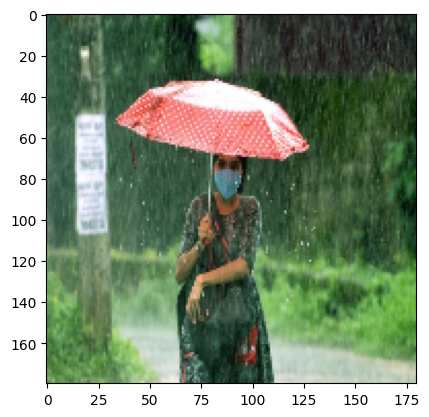

1/1 [==============================] - 0s 56ms/step
The predicted class is rain


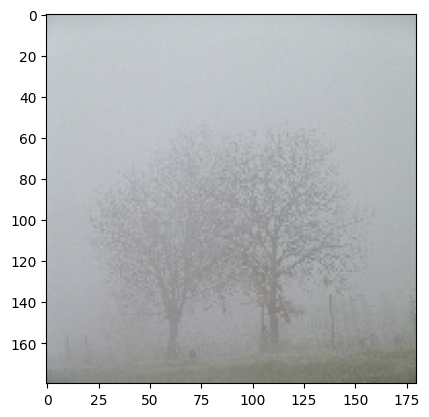

1/1 [==============================] - 0s 53ms/step
The predicted class is fogsmog


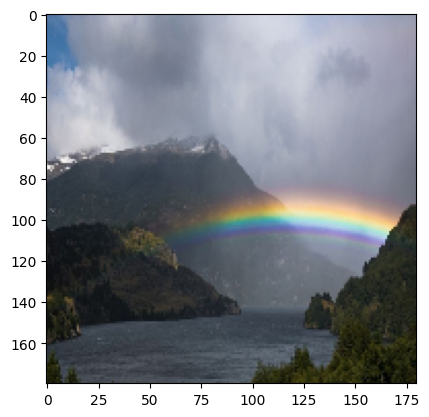

1/1 [==============================] - 0s 55ms/step
The predicted class is rainbow


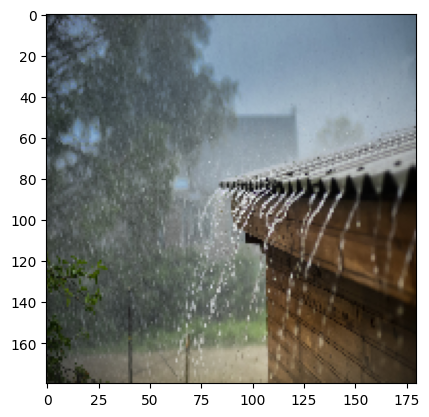

1/1 [==============================] - 0s 56ms/step
The predicted class is rain


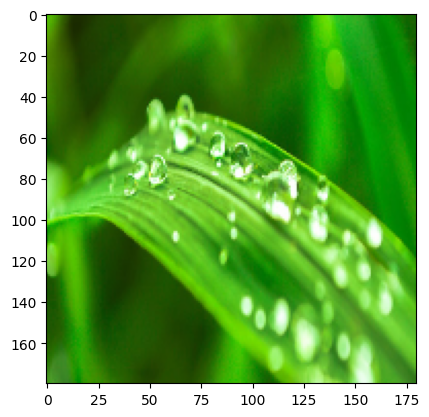

1/1 [==============================] - 0s 58ms/step
The predicted class is dew


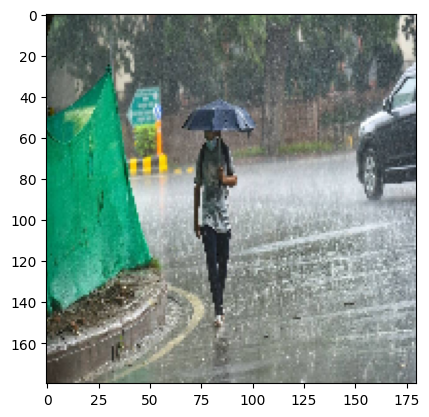

1/1 [==============================] - 0s 56ms/step
The predicted class is rain


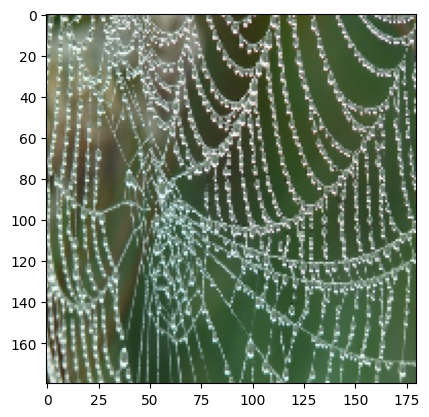

1/1 [==============================] - 0s 60ms/step
The predicted class is dew


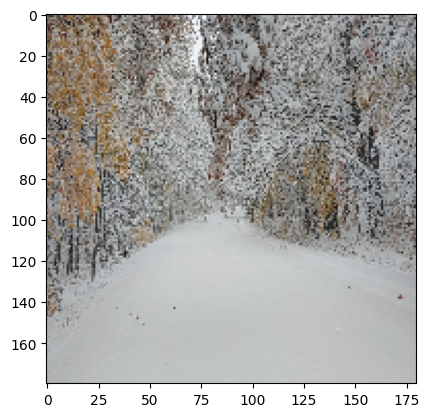

1/1 [==============================] - 0s 58ms/step
The predicted class is snow


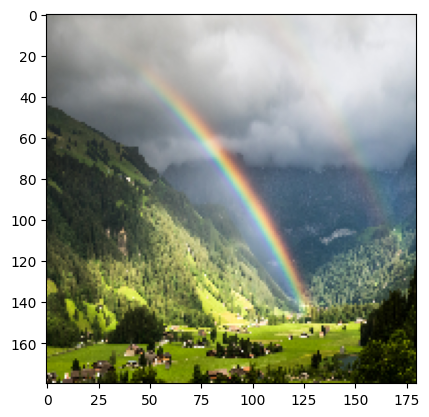

1/1 [==============================] - 0s 55ms/step
The predicted class is rainbow


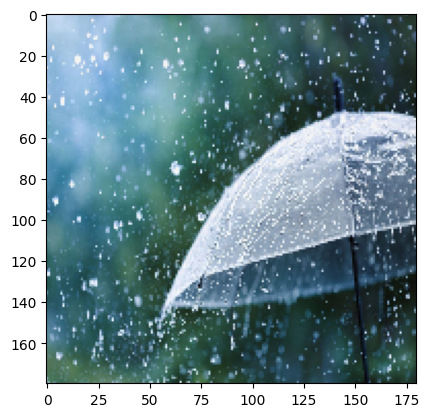

1/1 [==============================] - 0s 60ms/step
The predicted class is rain


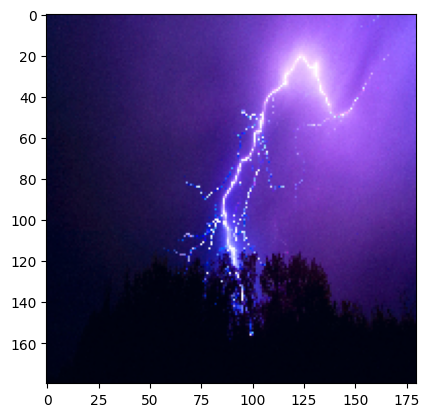

1/1 [==============================] - 0s 59ms/step
The predicted class is lightning


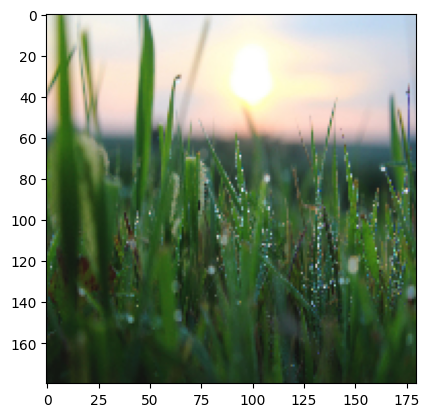

1/1 [==============================] - 0s 55ms/step
The predicted class is dew


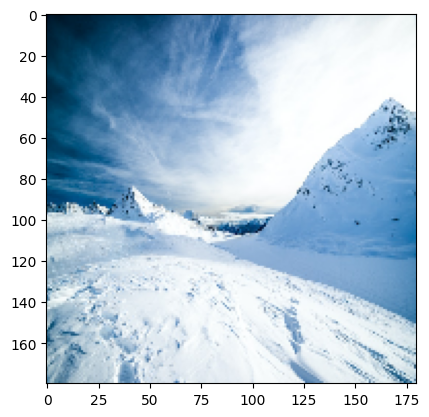

1/1 [==============================] - 0s 55ms/step
The predicted class is snow


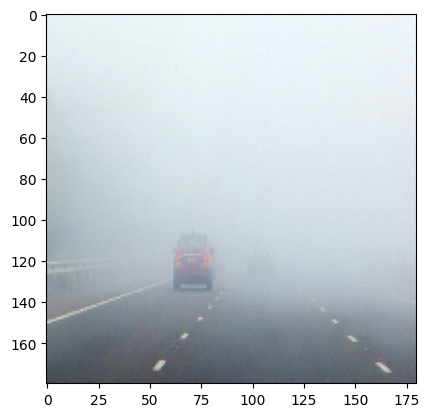

1/1 [==============================] - 0s 55ms/step
The predicted class is fogsmog


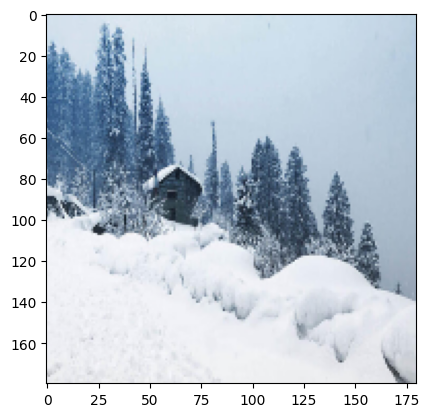

1/1 [==============================] - 0s 62ms/step
The predicted class is snow


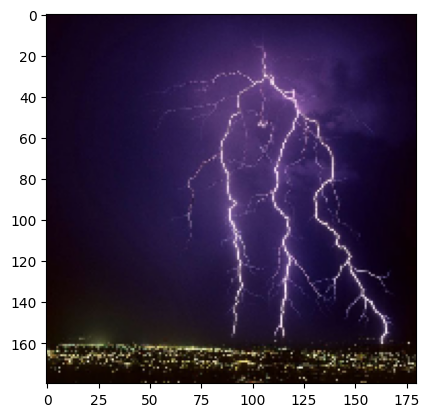

1/1 [==============================] - 0s 63ms/step
The predicted class is lightning


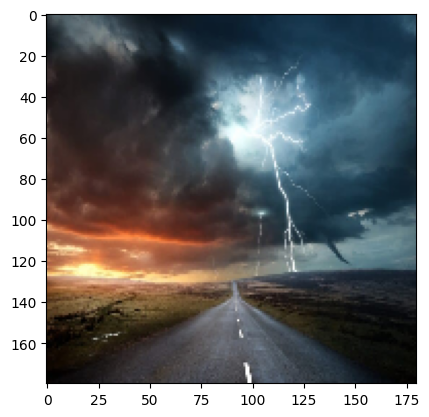

1/1 [==============================] - 0s 52ms/step
The predicted class is lightning


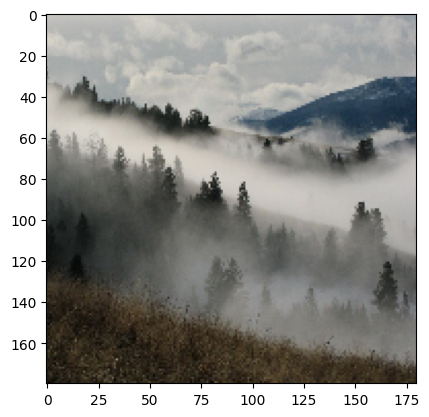

1/1 [==============================] - 0s 57ms/step
The predicted class is snow


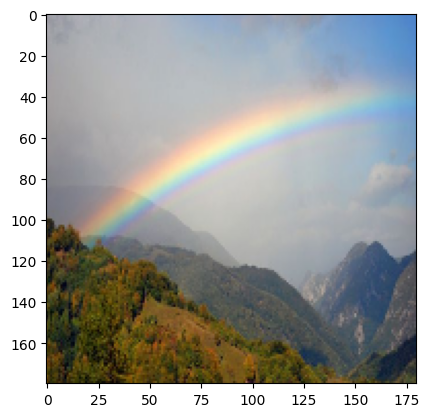

1/1 [==============================] - 0s 54ms/step
The predicted class is rainbow


In [29]:
for i in os.listdir(dir_path):
    image=cv2.imread(dir_path+'/'+i)
    image_resized= cv2.resize(image, (img_height,img_width))
    rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb)
    plt.show()
    image=np.expand_dims(image_resized,axis=0)
    pred=model2.predict(image)
    output_class=classes[np.argmax(pred)]
    print("The predicted class is", output_class)

# 3. Performance evaluation of the model

#### plotting model accuracy on training and validation on each epoch

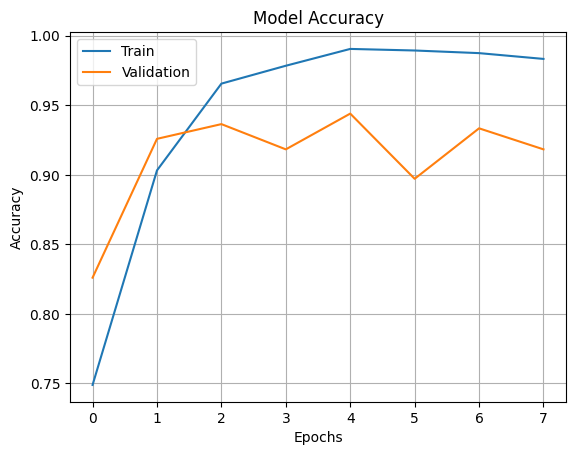

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.title('Model Accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['Train','Validation'])
plt.show()

#### plotting model loss on training and validation on each epoch

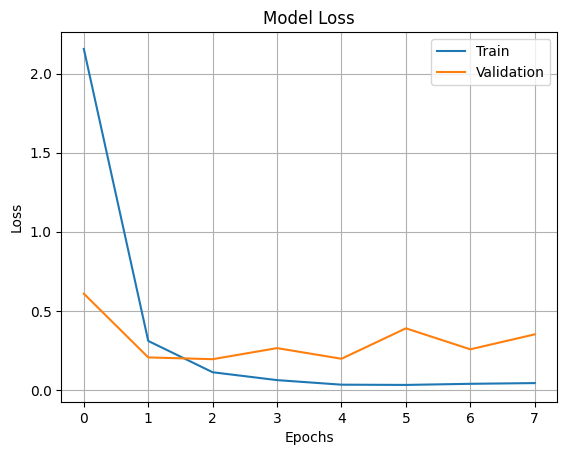

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['Train','Validation'])
plt.show()

In [ ]:
# saving our trained model

In [32]:
model2.save("weather_model.h5")